In [22]:
from __future__ import division
import h5py
import pylab as plt
import numpy as np
import swordfish as sf
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.neighbors import BallTree
from sklearn import svm
from WIMpy import DMUtils as DMU
from scipy.linalg import eig, eigvals
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})

In [23]:
def get_colors():
    # Colors for A, B, C, A and B
    colors = ['b', 'goldenrod', '#A0AAB2']
    return colors

def spline():
    x = np.linspace(2, 25, 100)
    y = np.sin(x)
    y = np.where(y>0, y, 0)

    f = interp1d(x[y>0], y[y>0], bounds_error = False, kind = 'quadratic',
            fill_value = 'extrapolate')
    plt.plot(x, f(x))
    plt.scatter(x, y)
    plt.show()

def make_plot(data, gap_rate = 0.5, label="test", operators=True, Ar=True):
    plt.figure(figsize = (4, 3))
    colors = get_colors()
    x_A = []
    x_B = []
    x_C = []
    y = []
    gap = 0
    for row in data:
        y0, y1, A, B, C, AandB = row
        dy = y1 - y0
        if AandB < 0.1:
            gap += gap_rate
            max_gap = C - B - A + AandB
            AandB = -min(gap, max_gap)
        AorB = A + B - AandB

        x0_C, x1_C = -0.5*C/dy, +0.5*C/dy
        x0_A, x1_B = -0.5*AorB/dy, +0.5*AorB/dy
        x1_A = x0_A + A/dy
        x0_B = x1_B - B/dy

        y.append([y0, y1])
        x_A.append([x0_A, x1_A])
        x_B.append([x0_B, x1_B])
        x_C.append([x0_C, x1_C])

    y = np.array(y)
    x_A = np.array(x_A)
    x_B = np.array(x_B)
    x_C = np.array(x_C)

    if operators:
        l_A = r'$\mathcal{H}_0:$ only $\mathcal{O}_{1}$'
        l_B = r'$\mathcal{H}_0:$ only $\mathcal{O}_{11}$'
        l_C = r'$\mathcal{H}_A:$ mixed $\mathcal{O}_1, \mathcal{O}_{11}$'
    else:
        l_A = r'$\mathcal{H}_0:$ only $\mathrm{Millicharge}$'
        l_B = r'$\mathcal{H}_0:$ only $\mathrm{Magnetic \, Dipole}$'
        l_C = r'$\mathcal{H}_A:$ mixed $\mathrm{Millicharge}, \mathrm{Magnetic Dipole}$'
        
    plt.fill_betweenx(y.mean(axis=1), x1 = x_C[:,0], x2 = x_C[:,1],
            color=colors[2], alpha = 0.5, linewidth = 0, label=l_C, hatch='')
    plt.fill_betweenx(y.mean(axis=1), x1 = x_A[:,0], x2 = x_A[:,1],
            color=colors[0], alpha = 0.5, linewidth = 0, label=l_A, hatch='|')
    plt.fill_betweenx(y.mean(axis=1), x1 = x_B[:,0], x2 = x_B[:,1],
            color=colors[1], alpha = 0.5, linewidth = 0, label=l_B, hatch='\\')
    plt.plot(x_B[:,0], y.mean(axis=1), linewidth = .5, color='k')
    plt.plot(x_B[:,1], y.mean(axis=1), linewidth = .5, color='k')
    plt.plot(x_A[:,0], y.mean(axis=1), linewidth = .5, color='k')
    plt.plot(x_A[:,1], y.mean(axis=1), linewidth = .5, color='k')
    plt.plot(x_C[:,0], y.mean(axis=1), linewidth = .5, color='0.5')
    plt.plot(x_C[:,1], y.mean(axis=1), linewidth = .5, color='0.5')
    #help(plt.fill_betweenx)

    Total = sum(data[:,4])
    plt.text(-0.46, 7, str(int(Total)))
    if Ar:
        plt.title(r"XENONnT + DarkSide20k")
    else:
        plt.title(r"XENONnT")
    plt.ylabel("Number of signal events")
    plt.xlim(-0.5,0.5)
    plt.ylim(0,160)
    plt.gca().get_xaxis().set_visible(False)
    #plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().tick_params(axis='y', which='major', right='on')
    plt.legend(loc=4)
    plt.grid(linestyle='-', alpha = 0.3, zorder=-10000)
    plt.tight_layout(pad=0.3)
    plt.savefig("../plots/venn" + label + ".pdf")
    plt.show()

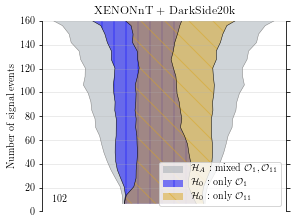

In [24]:
operator_Xe_Ar = np.loadtxt("venn_operators_Xe+Ar")
make_plot(operator_Xe_Ar, label="operator_Xe_Ar")

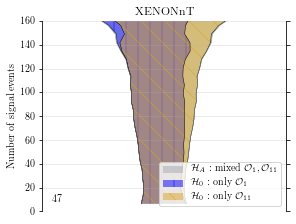

In [25]:
operator_Xe = np.loadtxt("venn_operators_Xe")
make_plot(operator_Xe, label="operator_Xe", Ar=False)

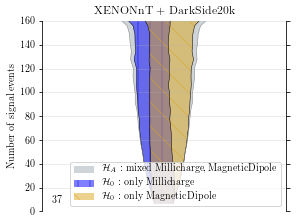

In [26]:
models_Xe_Ar = np.loadtxt("venn_models_Xe+Ar")
make_plot(models_Xe_Ar, operators=False, label="models_Xe+Ar")